In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets('03-Convolutional-Neural-Networks/MNIST_data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting 03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting 03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting 03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting 03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


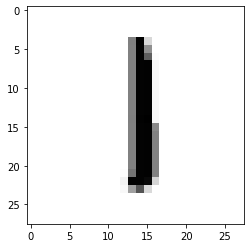

In [7]:
plt.imshow(mnist.train.images[12].reshape(28,28), cmap='Greys')

In [12]:
def generator(z, reuse=None):
    with tf.variable_scope('gen', reuse=reuse):
        hidden1 = tf.layers.dense(inputs=z, units=128, activation=lambda x: tf.nn.leaky_relu(x, alpha=0.01))
        hidden2 = tf.layers.dense(inputs=hidden1, units=128, activation=lambda x: tf.nn.leaky_relu(x, alpha=0.01))
        output = tf.layers.dense(hidden2, units=784, activation=tf.nn.tanh)
        return output
        

In [16]:
def discriminator(z, reuse=None):
    with tf.variable_scope('dis', reuse=reuse):
        hidden1 = tf.layers.dense(inputs=z, units=128, activation=lambda x: tf.nn.leaky_relu(x, alpha=0.01))
        hidden2 = tf.layers.dense(inputs=hidden1, units=128, activation=lambda x: tf.nn.leaky_relu(x, alpha=0.01))
        logits = tf.layers.dense(hidden2, units=1)
        output = tf.sigmoid(logits)
        return output, logits

In [14]:
real_images = tf.placeholder(tf.float32, shape=[None, 784])
z = tf.placeholder(tf.float32, shape=[None, 100])

In [15]:
G = generator(z)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [17]:
D_output_real, D_logits_real = discriminator(real_images)

In [20]:
D_output_fake, D_logits_fake = discriminator(G, reuse=True)

In [21]:
# LOSSES

def loss_func(logits_in, labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in, labels=labels_in))

In [25]:
D_real_loss = loss_func(D_logits_real, tf.ones_like(D_logits_real)*0.9)
D_fake_loss = loss_func(D_logits_fake, tf.zeros_like(D_logits_real))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [26]:
D_loss = D_real_loss + D_fake_loss

In [27]:
G_loss = loss_func(D_logits_fake, tf.ones_like(D_logits_fake))

In [31]:
learning_rate = 0.001

In [28]:
tvars =tf.trainable_variables()

d_vars = [var for var in tvars if 'dis' in var.name]
g_vars = [var for var in tvars if 'gen' in var.name]

In [32]:
D_trainer = tf.train.AdamOptimizer(learning_rate).minimize(D_loss, var_list=d_vars)

In [33]:
G_trainer = tf.train.AdamOptimizer(learning_rate).minimize(G_loss, var_list=g_vars)

In [34]:
batch_size = 100

In [35]:
epochs = 30

In [36]:
init = tf.global_variables_initializer()

In [37]:
samples = []

In [40]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        num_batches = mnist.train.num_examples // batch_size
        for i in range(num_batches):
            batch = mnist.train.next_batch(batch_size)
            batch_images = batch[0].reshape(batch_size, 784)
            batch_images = batch_images * 2 - 1
            
            batch_z = np.random.uniform(-1, 1, size=(batch_size, 100))
            
            _ = sess.run(D_trainer, feed_dict={real_images:batch_images, z:batch_z})
            _ = sess.run(G_trainer, feed_dict={z:batch_z})
        print("ON EPOCH {}".format(epoch))
        sample_z = np.random.uniform(-1,1, size=(1, 100))
        gen_sample = sess.run(generator(z, reuse=True), feed_dict={z:sample_z})
        samples.append(gen_sample)

ON EPOCH 0
ON EPOCH 1
ON EPOCH 2
ON EPOCH 3
ON EPOCH 4
ON EPOCH 5
ON EPOCH 6
ON EPOCH 7
ON EPOCH 8
ON EPOCH 9
ON EPOCH 10
ON EPOCH 11
ON EPOCH 12
ON EPOCH 13
ON EPOCH 14
ON EPOCH 15
ON EPOCH 16
ON EPOCH 17
ON EPOCH 18
ON EPOCH 19
ON EPOCH 20
ON EPOCH 21
ON EPOCH 22
ON EPOCH 23
ON EPOCH 24
ON EPOCH 25
ON EPOCH 26
ON EPOCH 27
ON EPOCH 28
ON EPOCH 29


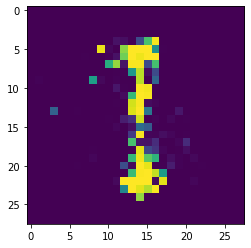

In [45]:
plt.imshow(samples[28].reshape(28,28))

In [46]:
saver = tf.train.Saver(var_list=g_vars)

In [50]:
new_samples = []
with tf.Session() as sess:
    saver.restore(sess, '06-Generative-Adversarial-Networks/models/500_epoch_model.ckpt')
    for x in range(5):
        sample_z = np.random.uniform(-1, 1, size=(1, 100))
        gen_sample = sess.run(generator(z, reuse=True), feed_dict={z:sample_z})
        new_samples.append(gen_sample)

INFO:tensorflow:Restoring parameters from 06-Generative-Adversarial-Networks/models/500_epoch_model.ckpt


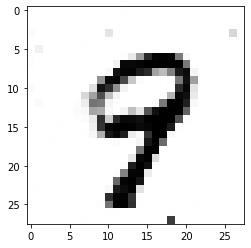

In [56]:
plt.imshow(new_samples[4].reshape(28,28), cmap='Greys')